# Heap Sort

# Algorithm

In [1]:
def heap_sort(arr):
    steps = 0

    def heapify(arr, heap_size, i):
        nonlocal steps
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2
        steps += 3

        # See if left/right child exists and is greater than root
        if left < heap_size and arr[left] > arr[largest]:
            largest = left
            steps += 3

        if right < heap_size and arr[right] > arr[largest]:
            largest = right
            steps += 3

        # Change root if needed, then Heapify the root
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            steps += 3
            heapify(arr, heap_size, largest)

    def heap_sort_inner(arr):
        nonlocal steps
        length = len(arr)
        mid = length // 2 - 1
        steps += 2

        for i in range(mid, -1, -1):
            heapify(arr, length, i)

        # Extract elements one by one
        for i in range(length - 1, 0, -1):
            arr[i], arr[0] = arr[0], arr[i]
            steps += 1
            heapify(arr, i, 0)
    
    heap_sort_inner(arr)
    return steps

arr = [12, 11, 13, 5, 6, 7]
heap_sort(arr)
print("Sorted array is:", arr)



    

Sorted array is: [5, 6, 7, 11, 12, 13]


In [2]:
B = [5, 2, 4, 6, 1, 3]
steps = heap_sort(B)
print(B, steps)

[1, 2, 3, 4, 5, 6] 88


13 / 13


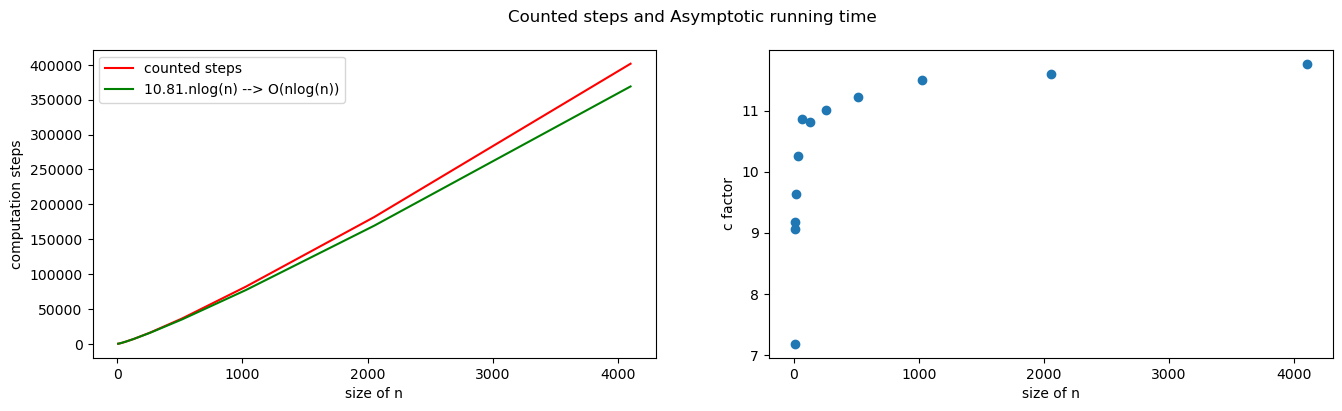

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import sys
from math import log
from IPython.display import clear_output

mpl.rcParams['figure.figsize'] = [16,4]
sys.setrecursionlimit(10000)

fig, ax = plt.subplots(1, 2)
fig.suptitle('Counted steps and Asymptotic running time')

points = 13 # plotting points
x = []
y = []
ref = []
c = []

for i in range(1, points):
    clear_output(wait = True)
    print(i + 1, "/", points)

    # Generate a new random array of size 5 + 2**i
    B = [random.randint(1, 10) for _ in range(5 + 2**i)]

    steps = heap_sort(B) 
    x.append(len(B))
    y.append(steps)    
    c.append(steps / (len(B) * log(len(B))))  # estimation of c for T(sort) = c.N.log(N)
    
    
for v in x:
    ref.append([v * log(v) * c[6]])
ax[0].plot(x, y, color="red", label="counted steps")
ax[0].plot(x, ref, color="green", label=str(round(c[6], 2)) + ".nlog(n) --> O(nlog(n))")
ax[0].set_xlabel("size of n")
ax[0].set_ylabel("computation steps")
ax[0].legend()

ax[1].scatter(x, c, label = "approximation of c" )
ax[1].set_xlabel("size of n")
ax[1].set_ylabel("c factor")

plt.show()    